In [1]:
import biofeatures
import biosignalsnotebooks as bsnb

data, header = bsnb.load("Sensor data/ECG.h5", get_header=True)

sampling_rate = header["sampling rate"]
channel = list(data.keys())[1]

signal = data[channel]

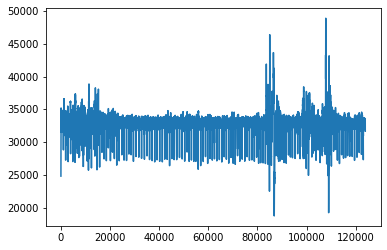

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(signal)

In [21]:
r_peaks, rr_intervals = biofeatures.r_peak_intervals(data = signal, sampling_rate = sampling_rate)
print(rr_intervals[:10])

[ 826  920 1007  998  511  383  325  630  902  270]


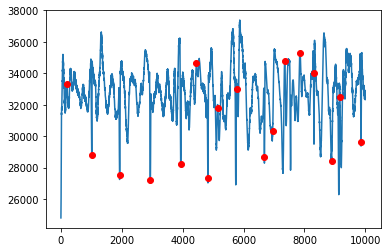

In [20]:
plt_peaks = (np.array(r_peaks[0][:17]) * sampling_rate).astype(int)

plt.figure()
plt.plot(signal[: sampling_rate * 10])
plt.plot(plt_peaks, signal[plt_peaks], 'ro')


In [22]:
features = biofeatures.hrv_features(rr_intervals)

print(features)

{'nni_mean': 824.9194630872483, 'hr_mean': 84.33210854982532, 'hr_std': 45.02873656098175, 'rmssd': 205.39020214006106, 'lf': 6004.521268964863, 'hf': 4781.092420945251, 'LF/HF ratio': 1.2558889768915473}


In [2]:
HRV = biofeatures.hrv(signal, srate = sampling_rate)

In [3]:
HRV.srate

1000

In [4]:
HRV.r_peak_intervals(HRV.data)

In [5]:
HRV.r_intervals

array([ 826,  920, 1007,  998,  511,  383,  325,  630,  902,  270,  393,
        503,  472,  567,  276,  693,  843,  590,  224,  909, 1120,  421,
        719, 1072,  951,  861,  928,  806,  851,  818,  784,  967, 1025,
       1034,  922, 1008,  952,  920,  936, 1027, 1146, 1136, 1167, 1051,
       1042, 1056, 1033,  961, 1061, 1081,  990,  976,  992,  975,  857,
       1059, 1137, 1077, 1042,  980,  849,  911,  966,  829,  951, 1029,
       1034,  917,  893,  924,  957,  878,  966, 1025,  993,  967,  899,
        960,  926,  864,  873,  933,  901,  999, 1029,  966,  946,  981,
       1005,  940,  807,  843,  957,  958,  382,  591,  222,  575,  500,
        417,  738,  879,  888,  822,  755,  827,  876,  934,  766,  833,
       1067, 1057,  995,  969,  492,  393,  710,  246,  987,  980,  437,
        442,  830,  867,  794,  878,  907,  517,  388,  653,  385,  370,
        225,  269,  892,  772,  784,  837,  865,  784,  850,  826,  855,
        996,  958, 1001,  895,  922,  754])

In [6]:
HRV.hrv_features()

In [7]:
HRV.features

[{'nni_mean': 824.9194630872483,
  'hr_mean': 84.33210854982532,
  'hr_std': 45.02873656098175,
  'rmssd': 205.39020214006106,
  'lf': 6004.521268964863,
  'hf': 4781.092420945251,
  'LF/HF ratio': 1.2558889768915473}]

In [8]:
HRV.feature_names

dict_keys(['nni_mean', 'hr_mean', 'hr_std', 'rmssd', 'lf', 'hf', 'LF/HF ratio'])

In [9]:
HRV.detect_trends()

In [10]:
HRV.features = HRV.features + HRV.features

In [11]:
HRV.features

[{'nni_mean': 824.9194630872483,
  'hr_mean': 84.33210854982532,
  'hr_std': 45.02873656098175,
  'rmssd': 205.39020214006106,
  'lf': 6004.521268964863,
  'hf': 4781.092420945251,
  'LF/HF ratio': 1.2558889768915473},
 {'nni_mean': 824.9194630872483,
  'hr_mean': 84.33210854982532,
  'hr_std': 45.02873656098175,
  'rmssd': 205.39020214006106,
  'lf': 6004.521268964863,
  'hf': 4781.092420945251,
  'LF/HF ratio': 1.2558889768915473}]

In [12]:
HRV.detect_trends()

In [13]:
HRV.current_trends

{'nni_mean': 0.0,
 'hr_mean': -7.105427357601002e-15,
 'hr_std': 0.0,
 'rmssd': -2.842170943040401e-14,
 'lf': -9.094947017729282e-13,
 'hf': -9.094947017729282e-13,
 'LF/HF ratio': 0.0}

# Test 30min recording

In [13]:
import csv, json
import numpy as np

with open("Sensor data/ECG_long.txt") as datafile:
    readdata = csv.reader(datafile, delimiter='\t')
    header = [next(readdata), next(readdata), next(readdata)]
    header_json = json.loads(header[1][0][1:])
print(header_json)

data = np.genfromtxt("Sensor data/ECG_long.txt")
print(data.shape)


{'20:18:05:28:46:81': {'sensor': ['ECGBIT'], 'device name': '20:18:05:28:46:81', 'column': ['nSeq', 'I1', 'I2', 'O1', 'O2', 'A1'], 'sync interval': 2, 'time': '13:54:1.892', 'comments': '', 'device connection': '/dev/tty.BITalino-46-81-DevB', 'channels': [1], 'keywords': '', 'convertedValues': 0, 'mode': 0, 'digital IO': [0, 0, 1, 1], 'firmware version': 1281, 'device': 'bitalino_rev', 'position': 0, 'sampling rate': 100, 'label': ['A1'], 'resolution': [4, 1, 1, 1, 1, 10], 'date': '2020-2-24', 'special': [{}]}}
(182295, 6)


In [29]:
sampling_rate = header_json[list(header_json.keys())[0]]['sampling rate']

In [21]:
signal = data[:,-1]
signal[:10]

array([519., 517., 516., 516., 518., 519., 519., 518., 521., 523.])

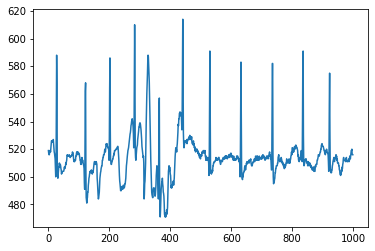

In [26]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(signal[:1000])

In [30]:
import biofeatures

HRV = biofeatures.hrv(signal, srate = sampling_rate)
HRV.r_peak_intervals(HRV.data)

In [31]:
HRV.r_intervals

array([ 950,  800,  810, ..., 1040, 1070,  910])

In [32]:
HRV.hrv_features()

In [33]:
HRV.features

[{'nni_mean': 913.92,
  'hr_mean': 66.29,
  'hr_std': 7.7,
  'rmssd': 80.08,
  'lf': 2223.36,
  'hf': 1977.05,
  'LF/HF ratio': 1.12}]

In [34]:
len(HRV.data)

182295

In [35]:
180000/(60*30)

100.0

In [62]:
HRV_rt = biofeatures.hrv([], srate = sampling_rate, buffer_length=5000)
all_trends = []

for i in range(1,180):
    data = signal[:i * 1000]
    HRV_rt.set_data(data[-HRV_rt.buffer_length:])
    HRV_rt.r_peak_intervals(data)
    HRV_rt.hrv_features()
    print(HRV_rt.features[-1])
    
    if i > 1:
        HRV_rt.detect_trends()
        print(HRV_rt.current_trends)
        all_trends.append(HRV_rt.current_trends)

{'nni_mean': 896.3, 'hr_mean': 67.68, 'hr_std': 7.41, 'rmssd': 89.9, 'lf': 4864.18, 'hf': 4491.47, 'LF/HF ratio': 1.08}
{'nni_mean': 850.91, 'hr_mean': 71.37, 'hr_std': 7.92, 'rmssd': 70.85, 'lf': 10559.11, 'hf': 910.09, 'LF/HF ratio': 11.6}
{'nni_mean': -45.3900000000001, 'hr_mean': 3.6899999999999764, 'hr_std': 0.5099999999999989, 'rmssd': -19.05000000000002, 'lf': 5694.9299999999985, 'hf': -3581.379999999999, 'LF/HF ratio': 10.519999999999996}
{'nni_mean': 842.06, 'hr_mean': 71.9, 'hr_std': 6.82, 'rmssd': 65.09, 'lf': 6222.98, 'hf': 380.13, 'LF/HF ratio': 16.37}
{'nni_mean': -27.120000000000054, 'hr_mean': 2.109999999999997, 'hr_std': -0.295000000000001, 'rmssd': -12.40500000000001, 'lf': 679.3999999999985, 'hf': -2055.670000000001, 'LF/HF ratio': 7.645}
{'nni_mean': 837.45, 'hr_mean': 72.21, 'hr_std': 6.34, 'rmssd': 68.22, 'lf': 3116.92, 'hf': 723.34, 'LF/HF ratio': 4.31}
{'nni_mean': -18.540000000000195, 'hr_mean': 1.411999999999979, 'hr_std': -0.43100000000000205, 'rmssd': -7.080

{'nni_mean': 909.06, 'hr_mean': 66.5, 'hr_std': 5.88, 'rmssd': 75.1, 'lf': 2671.54, 'hf': 1670.93, 'LF/HF ratio': 1.6}
{'nni_mean': 1.927197580645164, 'hr_mean': -0.15618548387096773, 'hr_std': -0.04417741935483871, 'rmssd': 0.1145080645161292, 'lf': -96.50850403225796, 'hf': -0.8735241935484389, 'LF/HF ratio': -0.15524193548387089}
{'nni_mean': 909.2, 'hr_mean': 66.48, 'hr_std': 5.83, 'rmssd': 75.01, 'lf': 2671.54, 'hf': 1670.93, 'LF/HF ratio': 1.6}
{'nni_mean': 1.8646077712610232, 'hr_mean': -0.15104288856304823, 'hr_std': -0.04290505865102626, 'rmssd': 0.1122653958944307, 'lf': -89.45063782991187, 'hf': -0.27391129032251776, 'LF/HF ratio': -0.14598790322580638}
{'nni_mean': 909.53, 'hr_mean': 66.45, 'hr_std': 5.79, 'rmssd': 75.26, 'lf': 2671.54, 'hf': 1670.93, 'LF/HF ratio': 1.6}
{'nni_mean': 1.8045220588235262, 'hr_mean': -0.14613302139037368, 'hr_std': -0.04183489304812825, 'rmssd': 0.11114304812834377, 'lf': -83.12218917112287, 'hf': 0.2245588235294197, 'LF/HF ratio': -0.13753676

{'nni_mean': 914.79, 'hr_mean': 66.12, 'hr_std': 5.97, 'rmssd': 78.98, 'lf': 2400.35, 'hf': 1927.65, 'LF/HF ratio': 1.25}
{'nni_mean': 0.9432084521648938, 'hr_mean': -0.07399922219341436, 'hr_std': -0.015819937775473164, 'rmssd': 0.14858828104744576, 'lf': -30.926068835882813, 'hf': 7.3444179414052355, 'LF/HF ratio': -0.05558011407829916}
{'nni_mean': 914.25, 'hr_mean': 66.15, 'hr_std': 5.95, 'rmssd': 78.7, 'lf': 2400.35, 'hf': 1927.65, 'LF/HF ratio': 1.25}
{'nni_mean': 0.9205090897905038, 'hr_mean': -0.0721806269033204, 'hr_std': -0.015348980282383426, 'rmssd': 0.1466470823464259, 'lf': -29.907455781475967, 'hf': 7.397860284844173, 'LF/HF ratio': -0.053976129687163574}
{'nni_mean': 914.11, 'hr_mean': 66.16, 'hr_std': 5.92, 'rmssd': 78.58, 'lf': 2400.35, 'hf': 1927.65, 'LF/HF ratio': 1.25}
{'nni_mean': 0.8982437171244841, 'hr_mean': -0.07040151957919409, 'hr_std': -0.0149491525423729, 'rmssd': 0.14444476914085302, 'lf': -28.9382869666862, 'hf': 7.4335102279368535, 'LF/HF ratio': -0.052

{'nni_mean': 912.2, 'hr_mean': 66.25, 'hr_std': 5.64, 'rmssd': 77.5, 'lf': 2023.9, 'hf': 1867.98, 'LF/HF ratio': 1.08}
{'nni_mean': 0.0834048346762965, 'hr_mean': -0.006627118644068027, 'hr_std': -0.004632953598221787, 'rmssd': 0.04985940539038559, 'lf': -7.089985273687157, 'hf': 5.43529202556264, 'LF/HF ratio': -0.007959433175882203}
{'nni_mean': 912.68, 'hr_mean': 66.21, 'hr_std': 5.63, 'rmssd': 77.46, 'lf': 2023.9, 'hf': 1867.98, 'LF/HF ratio': 1.08}
{'nni_mean': 0.07190358432896934, 'hr_mean': -0.005802445123646024, 'hr_std': -0.004679911086412949, 'rmssd': 0.046536537927201714, 'lf': -7.561184217838335, 'hf': 5.138969991664341, 'LF/HF ratio': -0.008005279244234519}
{'nni_mean': 912.92, 'hr_mean': 66.19, 'hr_std': 5.62, 'rmssd': 77.46, 'lf': 2023.9, 'hf': 1867.98, 'LF/HF ratio': 1.08}
{'nni_mean': 0.06341178105028142, 'hr_mean': -0.005211169769380931, 'hr_std': -0.004787163100861382, 'rmssd': 0.0434201166990821, 'lf': -8.007043067518767, 'hf': 4.851510141706015, 'LF/HF ratio': -0.0

{'nni_mean': 906.99, 'hr_mean': 66.83, 'hr_std': 8.09, 'rmssd': 79.25, 'lf': 2259.65, 'hf': 1935.31, 'LF/HF ratio': 1.17}
{'nni_mean': -0.11447457627119387, 'hr_mean': 0.010324812447901737, 'hr_std': 0.03500083356487914, 'rmssd': 0.005150041678243581, 'lf': -7.25604779105309, 'hf': -0.12658655181996614, 'LF/HF ratio': -0.0036924145595998966}
{'nni_mean': 906.85, 'hr_mean': 66.83, 'hr_std': 8.06, 'rmssd': 79.13, 'lf': 2259.65, 'hf': 1935.31, 'LF/HF ratio': 1.17}
{'nni_mean': -0.11846874131703894, 'hr_mean': 0.010866073909418643, 'hr_std': 0.037566824117810475, 'rmssd': 0.007504584606834675, 'lf': -6.736451514309543, 'hf': -0.04293664906920131, 'LF/HF ratio': -0.0034709641567102056}
{'nni_mean': 906.68, 'hr_mean': 66.84, 'hr_std': 8.04, 'rmssd': 78.95, 'lf': 2259.65, 'hf': 1935.31, 'LF/HF ratio': 1.17}
{'nni_mean': -0.12153876076688928, 'hr_mean': 0.011331758821894506, 'hr_std': 0.03995443178660734, 'rmssd': 0.009183106418449395, 'lf': -6.214055015282038, 'hf': 0.03998082800776518, 'LF/H

{'nni_mean': 906.7, 'hr_mean': 66.81, 'hr_std': 7.68, 'rmssd': 78.03, 'lf': 2209.19, 'hf': 1862.74, 'LF/HF ratio': 1.19}
{'nni_mean': -0.13984662406224793, 'hr_mean': 0.01428896915809857, 'hr_std': 0.05133537093637116, 'rmssd': 0.009058349541538448, 'lf': 5.7072361767157345, 'hf': 0.022751319811048602, 'LF/HF ratio': 0.0029766601833842677}
{'nni_mean': 906.85, 'hr_mean': 66.79, 'hr_std': 7.66, 'rmssd': 77.97, 'lf': 2209.19, 'hf': 1862.74, 'LF/HF ratio': 1.19}
{'nni_mean': -0.1385384829119295, 'hr_mean': 0.014101417060294242, 'hr_std': 0.05000777993887187, 'rmssd': 0.008364267852180633, 'lf': 5.771424006668497, 'hf': -0.00571603223119362, 'LF/HF ratio': 0.003031119755487631}
{'nni_mean': 906.86, 'hr_mean': 66.79, 'hr_std': 7.64, 'rmssd': 77.9, 'lf': 2209.19, 'hf': 1862.74, 'LF/HF ratio': 1.19}
{'nni_mean': -0.1379130313976199, 'hr_mean': 0.013951097527090114, 'hr_std': 0.04857349263684353, 'rmssd': 0.007756043345373243, 'lf': 5.8287132536815704, 'hf': -0.03168380105586292, 'LF/HF ratio'

{'nni_mean': 908.97, 'hr_mean': 66.61, 'hr_std': 7.39, 'rmssd': 77.94, 'lf': 2267.7, 'hf': 1881.8, 'LF/HF ratio': 1.21}
{'nni_mean': -0.0040158377327072685, 'hr_mean': -0.0010094470686307293, 'hr_std': -0.014116976938038378, 'rmssd': -0.03328619060850351, 'lf': 2.5001203111975356, 'hf': -1.568053903862191, 'LF/HF ratio': 0.002299805501528185}
{'nni_mean': 909.1, 'hr_mean': 66.6, 'hr_std': 7.38, 'rmssd': 77.9, 'lf': 2257.55, 'hf': 1876.19, 'LF/HF ratio': 1.2}
{'nni_mean': 0.0033995554320556958, 'hr_mean': -0.0015998888580163574, 'hr_std': -0.01424145595998895, 'rmssd': -0.03199305362600833, 'lf': 2.2499755487635373, 'hf': -1.519659349819415, 'LF/HF ratio': 0.002126701861628222}
{'nni_mean': 909.07, 'hr_mean': 66.6, 'hr_std': 7.37, 'rmssd': 77.92, 'lf': 2257.55, 'hf': 1876.19, 'LF/HF ratio': 1.2}
{'nni_mean': 0.011551264240056354, 'hr_mean': -0.00224284523478824, 'hr_std': -0.014377327035287652, 'rmssd': -0.03014337315921147, 'lf': 1.9852484023339507, 'hf': -1.4683484301194998, 'LF/HF ra

In [63]:
len(all_trends)

178

In [43]:
len(HRV_rt.features)

179

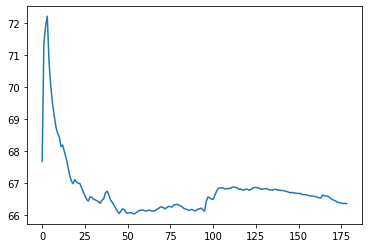

In [70]:
plt.plot([f["hr_mean"] for f in HRV_rt.features])

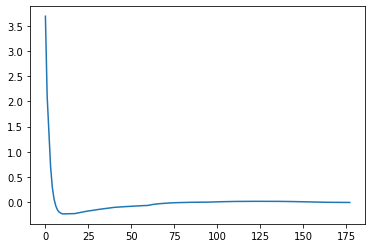

In [71]:
plt.plot([t["hr_mean"] for t in all_trends])

In [72]:
for i in range(1,150):
    print(all_trends[i]['rmssd'] * 1000/HRV_rt.features[i]['rmssd'])

-175.088214537756
-108.7724688892307
-68.73350923482855
-34.44844958789182
-17.15985939708869
-10.21208106949263
-8.590694538098493
-8.866928330390635
-8.792782471717036
-9.20983641466266
-8.057099541141278
-5.639408695435885
-3.429643344377334
-1.8963933190416717
-0.9096186711544288
-0.23644646711523193
0.07410586350917706
0.23348217779815333
0.2718786443823741
0.2352140969179732
0.3300596198191217
0.7161924335305792
1.0021561541498303
1.21193349134526
1.310282013191041
1.4164813129781202
1.4890977700650214
1.5285706714732559
1.51405612212256
1.4948787735609947
1.4817097470783065
1.4495407517245433
1.381326981890568
1.3193015474588452
1.2441397965237164
1.1637682147829784
1.1399496662654691
1.3031675091874428
1.3902712062654423
1.5203045547619338
1.6283825386999107
1.7147075378651901
1.7839647059096821
1.8312586826099413
1.8685606123961587
1.8889738968011558
1.905758119147252
1.9233058829918928
1.9195358809433805
1.9169739875968252
1.920630514378265
1.9093341276107578
1.90489139553853